## SeaIce Extent V3 - Daily Updated

__pyversion__==3.7   
__author__==S.Bell

__general info__ https://nsidc.org/data/g02135   
__datasource__ ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx

See https://blogs.helmholtz.de/polarpredictionmatters/2018/07/polar-forecasts-against-impacts-of-declining-bering-sea-ice-on-alaska-coastal-communities-part-1/ for reference.

Sources and Citations (see data)
- Daily Bering Sea ice extent during the past fourty years (data from the NSIDC Regional Sea Ice Index)

- Fetterer, F., K. Knowles, W. Meier, M. Savoie, and A. K. Windnagel. 2017, updated daily. Sea Ice Index, Version 3. [Indicate subset used]. Boulder, Colorado USA. NSIDC: National Snow and Ice Data Center. doi: https://doi.org/10.7265/N5K072F8. [Date Accessed].

In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, WeekdayLocator, MonthLocator, DayLocator, HourLocator, DateFormatter
import matplotlib.ticker as ticker

import datetime


In [2]:
### specify primary bulk figure parameters
fontsize = 20
labelsize = 16
#plotstyle = 'seaborn'
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 1
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 1
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 1
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 1
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [3]:
fid = 'ftp://sidads.colorado.edu/DATASETS/NOAA/G02135/seaice_analysis/Sea_Ice_Index_Regional_Daily_Data_G02135_v3.0.xlsx'
page = 'Bering-Extent-km^2' #Bering-Area-km^2

In [4]:
dfe = pd.read_excel(fid,sheet_name=page)

In [5]:
dfe = dfe.interpolate()
dfe['doy_y2'] = dfe.index+365

dfmean = dfe.copy()
dfmean.drop(columns=[2018,2017,2016,2015],inplace=True)
dfmean['avg'] = dfmean.drop(59,axis=0).drop(['month','day'], axis=1).mean(axis=1)

#make missing days after present day
dfe[2019][dfe[2019].index > int(datetime.datetime.strftime(datetime.datetime.now(),'%j'))] = np.nan

/Users/bell/anaconda2/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


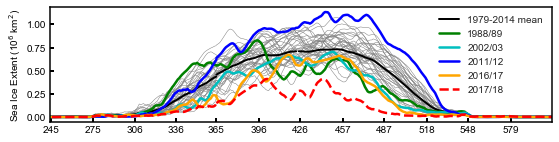

In [6]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l4 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l5 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l6 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
#l7 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
#plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/fig1.png',dpi=300)
fig.savefig('images/fig1.svg',dpi=300)

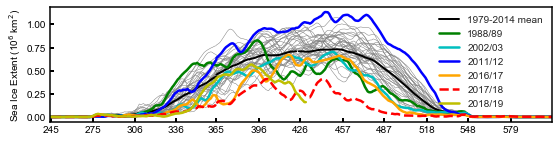

In [7]:
# start at Sep 1 (244)
# Area Extent in x10^6 km^2

fig = plt.figure(1,figsize=(9,2.125))
ax1 = plt.subplot2grid((1, 1), (0, 0), colspan=1, rowspan=1)
for yy in range(1978,2018,1):
    plt.plot(dfe.index,dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    plt.plot(dfe['doy_y2'],dfe[yy]/1e6,c='gray',linewidth=.5,label='')
    
#Fall
l1 = ax1.plot(dfmean.index,dfmean['avg']/1e6,'k',linewidth=2,label='1979-2014 mean')
l2 = ax1.plot(dfe.index,dfe[1988]/1e6,'g',linewidth=2.5,label='1988/89')
l3 = ax1.plot(dfe.index,dfe[2002]/1e6,'c-',linewidth=2.5,label='2002/03')
l4 = ax1.plot(dfe.index,dfe[2011]/1e6,'b-',linewidth=2.5,label='2011/12')
l5 = ax1.plot(dfe.index,dfe[2016]/1e6,'orange',linewidth=2.5,label='2016/17')
l6 = ax1.plot(dfe.index,dfe[2017]/1e6,'r--',linewidth=2.5,label='2017/18')
l7 = ax1.plot(dfe.index,dfe[2018]/1e6,'y-',linewidth=2.5,label='2018/19')
#Spring
plt.plot(dfmean['doy_y2'],dfmean['avg']/1e6,'k',linewidth=2,label='')
plt.plot(dfe['doy_y2'],dfe[1989]/1e6,'g',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2003]/1e6,'c-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2012]/1e6,'b-',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2017]/1e6,'orange',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2018]/1e6,'r--',linewidth=2.5,label='')
plt.plot(dfe['doy_y2'],dfe[2019]/1e6,'y-',linewidth=2.5,label='')

plt.legend()
plt.xticks((0,31,61,92,122,153,183,214,245,275,306,336,
               0+365,31+365,61+365,92+365,122+365,153+365,
               183+365,214+365,245+365,275+365,306+365,336+365),)
ax1.set_xlim([244,244+365])
#plt.yticks(np.arange(0,1.2,.4))
ax1.tick_params(axis='y',which='both',bottom='on')
plt.ylabel('Sea Ice Extent (10$^{6}$ km$^{2}$)')
fig.savefig('images/fig2.png',dpi=300)
fig.savefig('images/fig2.svg',dpi=300)